<a href="https://colab.research.google.com/github/J-Princess/Image_Preprocessing/blob/main/Flames_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import tensorflow as tf
from tensorflow.keras import layers
from skimage import io, feature
from skimage.color import rgb2gray, label2rgb
from skimage.transform import resize, rescale, rotate, warp, AffineTransform, SimilarityTransform, ProjectiveTransform
from skimage.filters import gaussian, threshold_otsu, threshold_mean
from skimage.measure import regionprops, label
from skimage.exposure import adjust_gamma
from skimage.util import img_as_ubyte
%matplotlib inline

In [17]:
folder_path = '/content/drive/MyDrive/Flames_data/flame_data/Test_1/Test/Fire'
images_dir = []

for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        images_dir.append(img)

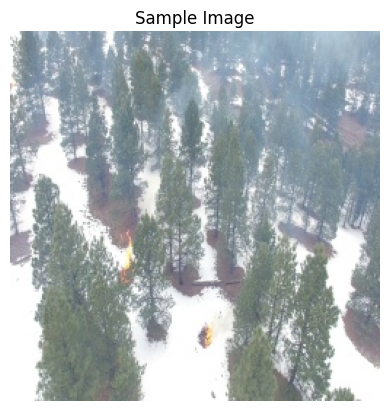

In [19]:
img = images_dir[0]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB

plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.title("Sample Image")
plt.show()

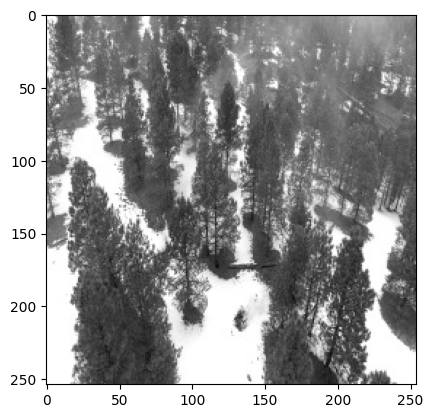

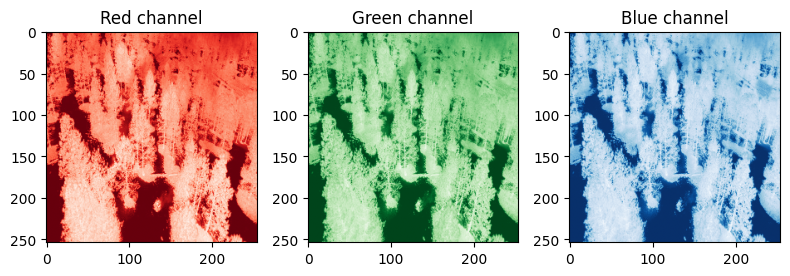

In [20]:
# Convert to greyscale
blocks_greyscale = rgb2gray(img)

# Separate the channels
red_channel = img[..., 0]
green_channel = img[..., 1]
blue_channel = img[..., 2]

plt.imshow(blocks_greyscale, cmap='gray')
# Plot the channels
fig, ax = plt.subplots(1, 3, figsize=(8, 6))
ax[0].imshow(red_channel, cmap='Reds')
ax[0].set_title('Red channel')
ax[1].imshow(green_channel, cmap='Greens')
ax[1].set_title('Green channel')
ax[2].imshow(blue_channel, cmap='Blues')
ax[2].set_title('Blue channel')
fig.tight_layout()
plt.show()

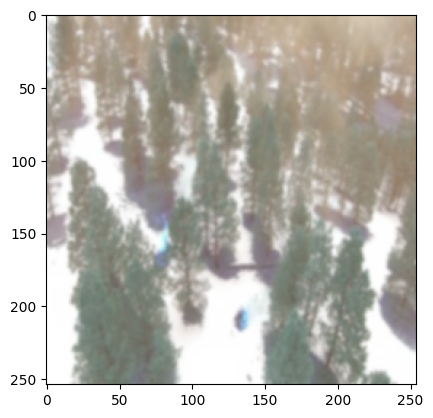

In [21]:
# Smooth the image/blurring
blocks_smoothed = gaussian(img, sigma=1, channel_axis=2)
plt.imshow(blocks_smoothed)

Text(0.5, 1.0, 'Rotated')

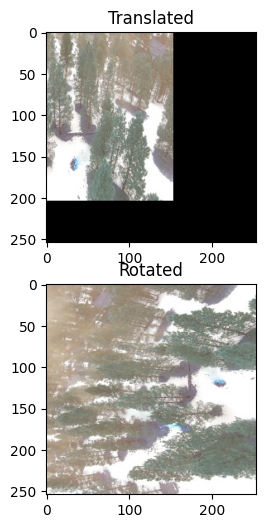

In [23]:
# Translate the image
t_transform = SimilarityTransform(translation=(100, 50))
blocks_translated = warp(img, t_transform)

# Rotate the image
blocks_rotated = rotate(img, 90)


# Display the images
fig, axes = plt.subplots(2,1, figsize=(10, 6))
ax = axes.ravel()
ax[0].imshow(blocks_translated)
ax[0].set_title("Translated")
ax[1].imshow(blocks_rotated)
ax[1].set_title("Rotated")

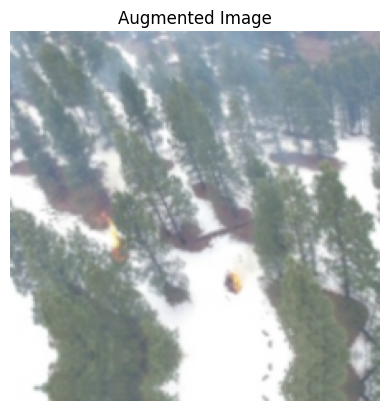

In [24]:
# Image augmenting

# Define the augmentation layers
augmentaion_pipeline = tf.keras.Sequential([
    layers.RandomFlip(), # Randomly flip the images horizontally or vertically
    layers.RandomRotation(factor=(-0.25, 0.25)), # Randomly rotate the images between -90 and 90 degrees
    layers.RandomTranslation(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)), # Randomly translate the images
    layers.RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)), # Randomly zoom the images
    layers.RandomCrop(224, 224) # Randomly crop the images to 224x224
])

img4 = cv2.resize(img_rgb, (256, 256))  # Must be >= crop or zoom size
img4 = tf.convert_to_tensor(img4, dtype=tf.float32) / 255.0
img4 = tf.expand_dims(img4, axis=0)  # Add batch dimension: (1, 256, 256, 3)


img_aug = augmentaion_pipeline(img4)
img_aug = tf.squeeze(img_aug)
# Show the image
plt.imshow(img_aug.numpy())
plt.axis('off')
plt.title("Augmented Image")
plt.show()